#### EDA for Scottish Hydro Electric Power Distribution (SHEPD)
##### Neil Martin

<p> This EDA focuses on the SHEPD dataset of the SSEN electricity network and attempts to identify patterns of outages against historical weather data </p>

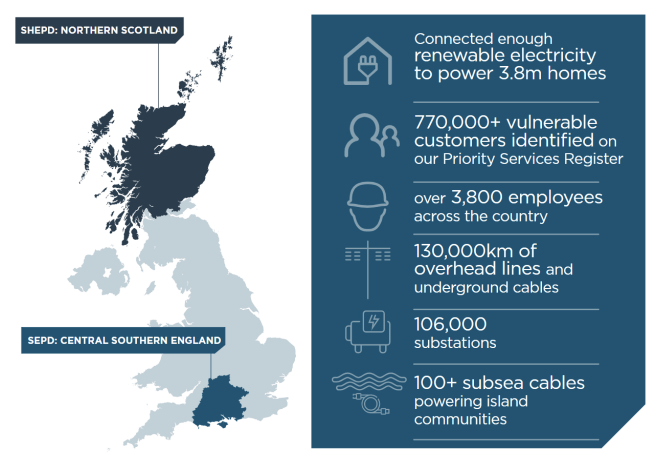

In [322]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [323]:
shepd = pd.read_csv('nafirs-climate-related-faults-shepd.csv')

/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_53753/4263276012.py:1: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  shepd = pd.read_csv('nafirs-climate-related-faults-shepd.csv')


In [324]:
shepd.head()

,District_Short_Code,Reporting Year,Voltage 1,Dist_HV_ref,Incident Time,NRN (North),Primary Nrn,Primary name,Equipment Code,Equipment,...,Component,Cause Code,Cause,Contributory Cause Code,Contributory Cause,Damage,Exceptional Event,hv cust affected,hv cust mins lost,Average Time off supply (Mins off)
0,N/EAST,2000,11,24H000001,01/04/2000 02:02,854_ 001,854.0,FRASERBURGH,1.0,Overhead Lines,...,"Jumper, other than live line -same material as...",30,Birds (including Swans and Geese),X,Not Applicable,0,No,966,103323,107
1,N/EAST,2000,11,24H000002,01/04/2000 03:27,854_ 001,854.0,FRASERBURGH,8.0,Not Applicable,...,Not Applicable,76,Extension of Fault Zone due to Fault Switching...,X,Not Applicable,0,No,259,8288,32
2,N/EAST,2000,11,24H000003,01/04/2000 06:31,849_ 002,849.0,ELLON 11 kV,8.0,Not Applicable,...,Not Applicable,99,Cause Unknown,X,Not Applicable,0,No,645,7095,11
3,ARGYLL,2000,11,57H000001,01/04/2000 07:30,304_ 001,304.0,KILMELFORD PS,1.0,Overhead Lines,...,Not Applicable,99,Cause Unknown,X,Not Applicable,0,No,20,2200,110
4,HIGH,2000,11,41H000001,01/04/2000 17:56,517_ 009,517.0,DRUMNADROCHIT,1.0,Overhead Lines,...,Not Applicable,99,Cause Unknown,X,Not Applicable,0,No,12,312,26


In [325]:
shepd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66542 entries, 0 to 66541
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   District_Short_Code                 66542 non-null  object 
 1   Reporting Year                      66542 non-null  int64  
 2   Voltage 1                           66542 non-null  object 
 3   Dist_HV_ref                         66542 non-null  object 
 4   Incident Time                       66542 non-null  object 
 5   NRN (North)                         66542 non-null  object 
 6   Primary Nrn                         66541 non-null  float64
 7   Primary name                        66391 non-null  object 
 8   Equipment Code                      66538 non-null  float64
 9   Equipment                           66542 non-null  object 
 10  Component Code                      61781 non-null  object 
 11  Component                           66542

#### Identify SHEPD districts

In [326]:
districts = shepd['District_Short_Code'].unique()

districts

array(['N/EAST', 'ARGYLL', 'HIGH', 'SHET', 'WISLES', 'ORKN', 'TAYCEN'],
      dtype=object)

#### Scottish Highlands Example

In [327]:
highlands = shepd[(shepd['District_Short_Code'] == 'HIGH')]

columns_to_drop = ['Dist_HV_ref', 'NRN (North)', 'Primary Nrn', 'Equipment Code', 'Cause Code', 'Component Code']
highlands = highlands.drop(columns=columns_to_drop)

highlands

,District_Short_Code,Reporting Year,Voltage 1,Incident Time,Primary name,Equipment,Component,Cause,Contributory Cause Code,Contributory Cause,Damage,Exceptional Event,hv cust affected,hv cust mins lost,Average Time off supply (Mins off)
4,HIGH,2000,11,01/04/2000 17:56,DRUMNADROCHIT,Overhead Lines,Not Applicable,Cause Unknown,X,Not Applicable,0,No,12,312,26
11,HIGH,2000,11,02/04/2000 06:57,DRUMNADROCHIT,Overhead Lines,Not Applicable,Cause Unknown,X,Not Applicable,1,No,24,4908,205
29,HIGH,2000,11,02/04/2000 12:18,DINGWALL,Overhead Lines,"Conductor, phase-bare","Snow, Sleet and Blizzard",X,Not Applicable,1,No,862,136063,158
33,HIGH,2000,11,02/04/2000 14:17,BLACKSTAND,Not Applicable,Not Applicable,Cause Unknown,X,Not Applicable,0,No,19,2793,147
34,HIGH,2000,11,02/04/2000 15:03,MUIR OF ORD,Overhead Lines,"Conductor, phase-bare","Snow, Sleet and Blizzard",X,Not Applicable,1,No,1328,138886,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66527,HIGH,2023,33,29/08/2023 07:45,BROADFORD GRID,Overhead Lines,"Stirrups, binders and tapes",Deterioration due to Ageing or Wear (excluding...,X,Not Applicable,1,No,0,0,0
66530,HIGH,2023,11,29/08/2023 11:56,CROSSHILLS,Overhead Lines,Unknown,Incorrect Protection Settings or Fuse Rating,X,Not Applicable,0,No,20,3575,179
66531,HIGH,2023,11,29/08/2023 14:39,MARYBANK,Overhead Lines,Unknown,Transient Fault - No Repair,X,Not Applicable,0,No,39,897,23
66532,HIGH,2023,33,29/08/2023 20:49,GRUDIE BRIDGE,Switchgear,Fuse carrier,Deterioration due to Ageing or Wear (excluding...,X,Not Applicable,1,No,1,35,35


In [328]:
highlands.dtypes

District_Short_Code                   object
Reporting Year                         int64
Voltage 1                             object
Incident Time                         object
Primary name                          object
Equipment                             object
Component                             object
Cause                                 object
Contributory Cause Code               object
Contributory Cause                    object
Damage                                 int64
Exceptional Event                     object
hv cust affected                       int64
hv cust mins lost                      int64
Average Time off supply (Mins off)     int64
dtype: object

#### Transformation of data types to datetime

In [329]:
highlands['Incident Time'] = pd.to_datetime(highlands['Incident Time'], format='%d/%m/%Y %H:%M')

#### Reindexing the dataframe to use the Incident Time as the index

In [330]:
highlands.set_index(['Incident Time'], inplace=True)

highlands.head()

,District_Short_Code,Reporting Year,Voltage 1,Primary name,Equipment,Component,Cause,Contributory Cause Code,Contributory Cause,Damage,Exceptional Event,hv cust affected,hv cust mins lost,Average Time off supply (Mins off)
Incident Time,,,,,,,,,,,,,,
2000-04-01 17:56:00,HIGH,2000,11,DRUMNADROCHIT,Overhead Lines,Not Applicable,Cause Unknown,X,Not Applicable,0,No,12,312,26
2000-04-02 06:57:00,HIGH,2000,11,DRUMNADROCHIT,Overhead Lines,Not Applicable,Cause Unknown,X,Not Applicable,1,No,24,4908,205
2000-04-02 12:18:00,HIGH,2000,11,DINGWALL,Overhead Lines,"Conductor, phase-bare","Snow, Sleet and Blizzard",X,Not Applicable,1,No,862,136063,158
2000-04-02 14:17:00,HIGH,2000,11,BLACKSTAND,Not Applicable,Not Applicable,Cause Unknown,X,Not Applicable,0,No,19,2793,147
2000-04-02 15:03:00,HIGH,2000,11,MUIR OF ORD,Overhead Lines,"Conductor, phase-bare","Snow, Sleet and Blizzard",X,Not Applicable,1,No,1328,138886,105


/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_53753/1646380901.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  highlands_yearly = highlands.resample('Y').size()


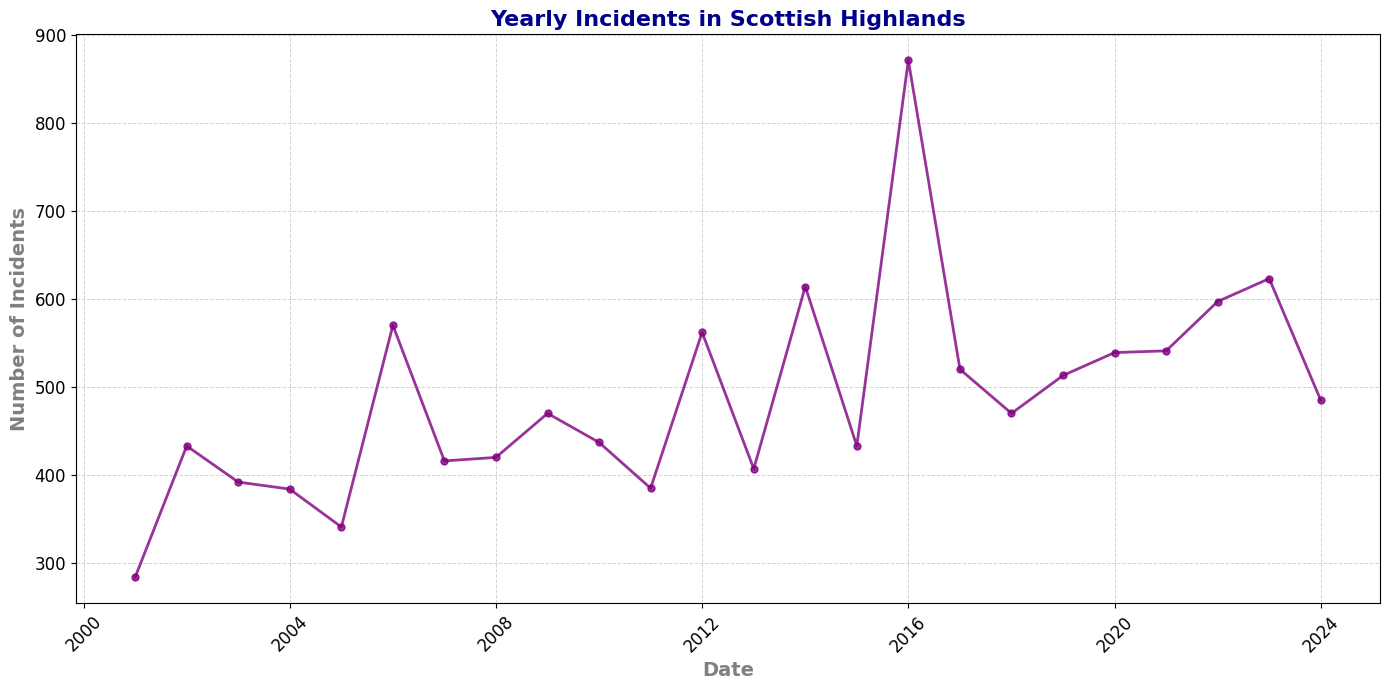

In [331]:
# Yearly incidents in Scottish Highlands
highlands_yearly = highlands.resample('Y').size()

plt.figure(figsize=(14, 7))
plt.plot(highlands_yearly.index, highlands_yearly, 
         marker='o', linestyle='-', color='purple', 
         linewidth=2, markersize=5, alpha=0.8)

plt.title('Yearly Incidents in Scottish Highlands', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Date', fontsize=14, fontweight='bold', color='gray')
plt.ylabel('Number of Incidents', fontsize=14, fontweight='bold', color='gray')

plt.grid(color='lightgray', linestyle='--', linewidth=0.7)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [332]:
highlands_2016 = highlands.iloc[highlands.index.year == 2016]

/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_53753/1194783494.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  highlands_2016_monthly = highlands_2016.resample('M').size()


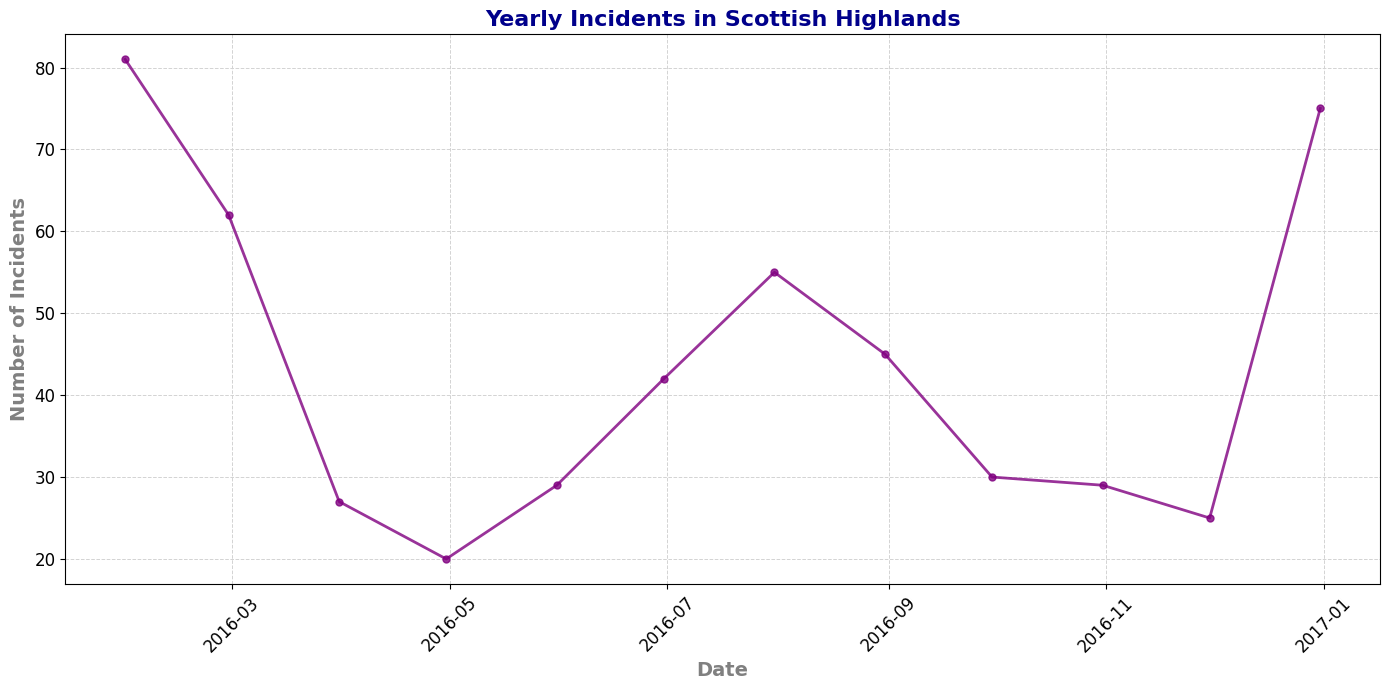

In [333]:
# Yearly incidents in Scottish Highlands
highlands_2016_monthly = highlands_2016.resample('M').size()

plt.figure(figsize=(14, 7))
plt.plot(highlands_2016_monthly.index, highlands_2016_monthly, 
         marker='o', linestyle='-', color='purple', 
         linewidth=2, markersize=5, alpha=0.8)

plt.title('Yearly Incidents in Scottish Highlands', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Date', fontsize=14, fontweight='bold', color='gray')
plt.ylabel('Number of Incidents', fontsize=14, fontweight='bold', color='gray')

plt.grid(color='lightgray', linestyle='--', linewidth=0.7)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

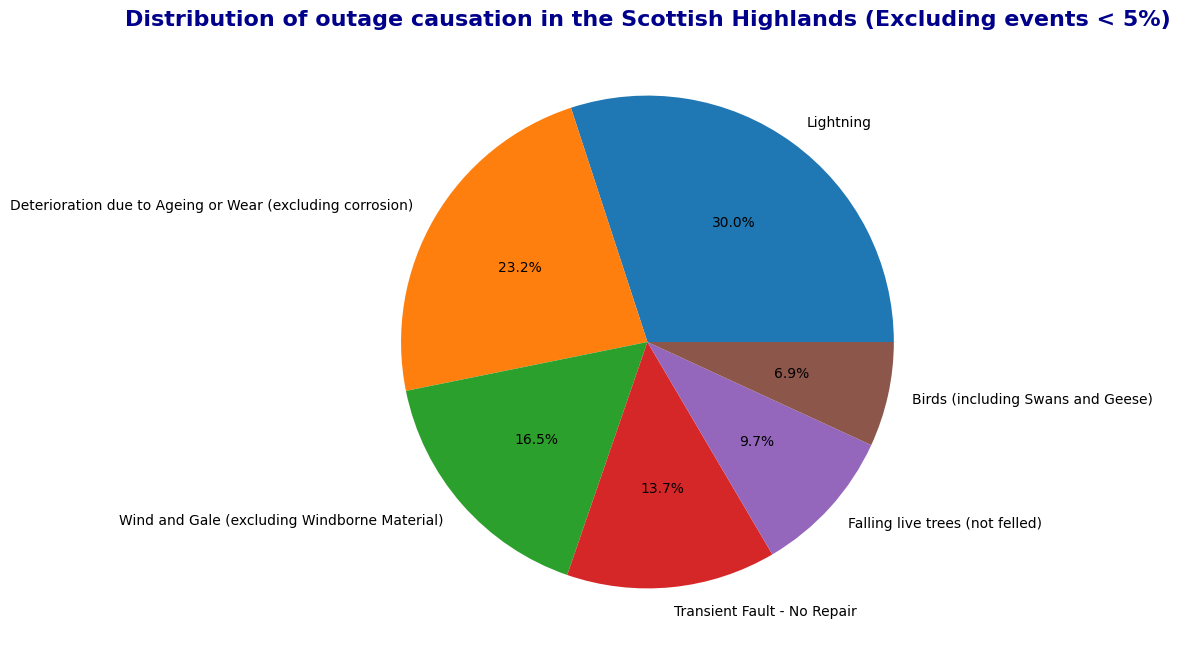

In [334]:
import pandas as pd
import matplotlib.pyplot as plt

cause_counts = highlands_2016['Cause'].value_counts()

total_incidents = cause_counts.sum()

cause_percentages = (cause_counts / total_incidents) * 100

filtered_cause_counts = cause_counts[cause_percentages >= 5]

plt.figure(figsize=(8,8))
filtered_cause_counts.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Outage Causes (Excluding < 5%)')
plt.ylabel('')  
plt.title('Distribution of outage causation in the Scottish Highlands (Excluding events < 5%)', fontsize=16, fontweight='bold', color='darkblue')
plt.show()


#### Braemar 2016 EDA

In [335]:
file_path = ('braemar-2016.csv')
braemar_df = pd.read_csv(file_path)

In [336]:
print(braemar_df.columns)

columns_to_drop = ['name', 'feelslikemin', 'feelslike', 'feelslikemax', 'cloudcover', 'precipprob', 'sunrise', 'sunset', 'moonphase', 'icon', 'stations', 'uvindex', 'solarenergy']

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')


In [337]:
braemar_df = braemar_df.drop(columns=columns_to_drop)

#### Analysing Storm Barbara through Braemar weather station data


In [338]:
braemar_df.head()

,datetime,tempmax,tempmin,temp,dew,humidity,precip,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,visibility,solarradiation,severerisk,conditions,description
0,2016-01-01,1.4,-2.1,-0.8,-2.0,91.5,0.542,8.33,"rain,snow",0.0,1.2,38.3,98.9,175.8,1012.7,21.2,14.6,NaN,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...
1,2016-01-02,3.6,1.5,2.8,2.1,95.0,11.080,16.67,"rain,snow",1.7,2.4,47.2,97.8,129.8,1004.1,18.6,4.9,NaN,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...
2,2016-01-03,3.2,1.0,2.3,1.7,96.1,14.743,16.67,"rain,snow",4.0,3.8,46.2,80.1,114.4,992.9,12.7,5.1,NaN,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...
3,2016-01-04,4.4,0.1,1.3,0.8,96.3,17.593,16.67,"rain,snow",13.0,12.5,47.2,86.1,99.5,987.0,10.6,7.9,NaN,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...
4,2016-01-05,3.7,-0.1,0.3,-0.1,96.8,9.811,16.67,"rain,snow",4.9,18.0,49.4,56.0,80.8,993.3,12.3,10.3,NaN,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...


In [339]:
braemar_df.dtypes

datetime             object
tempmax             float64
tempmin             float64
temp                float64
dew                 float64
humidity            float64
precip              float64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
visibility          float64
solarradiation      float64
severerisk          float64
conditions           object
description          object
dtype: object

In [340]:
braemar_df['datetime'] = pd.to_datetime(braemar_df['datetime'], format='%Y-%m-%d') 

In [341]:
braemar_df.set_index(['datetime'], inplace=True)

In [342]:
braemar_df.head()


,tempmax,tempmin,temp,dew,humidity,precip,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,visibility,solarradiation,severerisk,conditions,description
datetime,,,,,,,,,,,,,,,,,,,
2016-01-01,1.4,-2.1,-0.8,-2.0,91.5,0.542,8.33,"rain,snow",0.0,1.2,38.3,98.9,175.8,1012.7,21.2,14.6,NaN,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...
2016-01-02,3.6,1.5,2.8,2.1,95.0,11.080,16.67,"rain,snow",1.7,2.4,47.2,97.8,129.8,1004.1,18.6,4.9,NaN,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...
2016-01-03,3.2,1.0,2.3,1.7,96.1,14.743,16.67,"rain,snow",4.0,3.8,46.2,80.1,114.4,992.9,12.7,5.1,NaN,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...
2016-01-04,4.4,0.1,1.3,0.8,96.3,17.593,16.67,"rain,snow",13.0,12.5,47.2,86.1,99.5,987.0,10.6,7.9,NaN,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...
2016-01-05,3.7,-0.1,0.3,-0.1,96.8,9.811,16.67,"rain,snow",4.9,18.0,49.4,56.0,80.8,993.3,12.3,10.3,NaN,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...


In [343]:
print(braemar_df.columns)

Index(['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'visibility',
       'solarradiation', 'severerisk', 'conditions', 'description'],
      dtype='object')


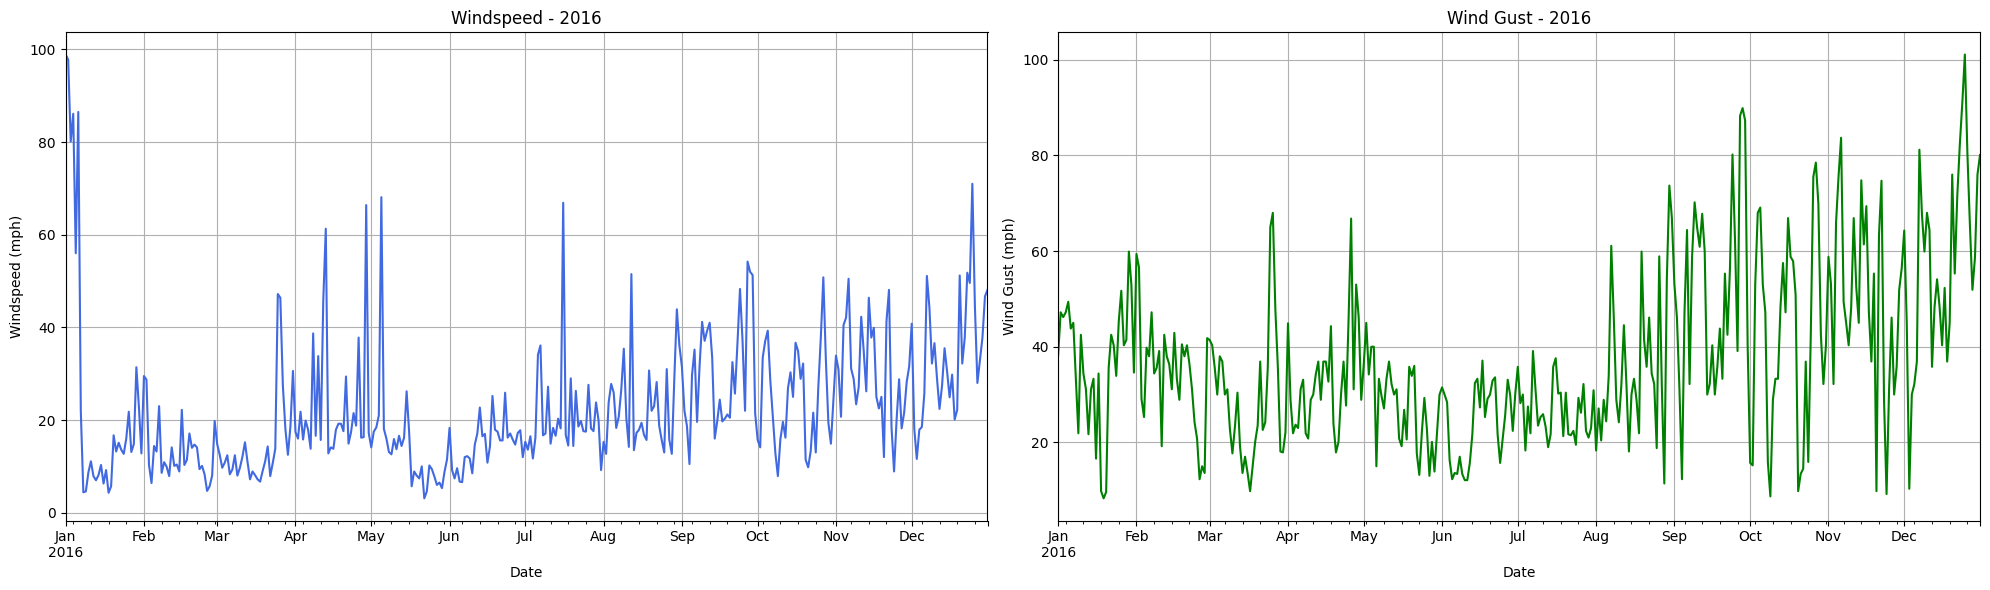

In [344]:
import matplotlib.pyplot as plt

# Create subplots for three plots: windspeed, dew, and sea level pressure
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

braemar_df['windspeed'].plot(ax=axs[0], color='royalblue', title="Windspeed - 2016")
axs[0].set_ylabel("Windspeed (mph)")
axs[0].set_xlabel("Date")
axs[0].grid(True)

braemar_df['windgust'].plot(ax=axs[1], color='green', title="Wind Gust - 2016")
axs[1].set_ylabel("Wind Gust (mph)")
axs[1].set_xlabel("Date")
axs[1].grid(True)

plt.tight_layout()
plt.show()



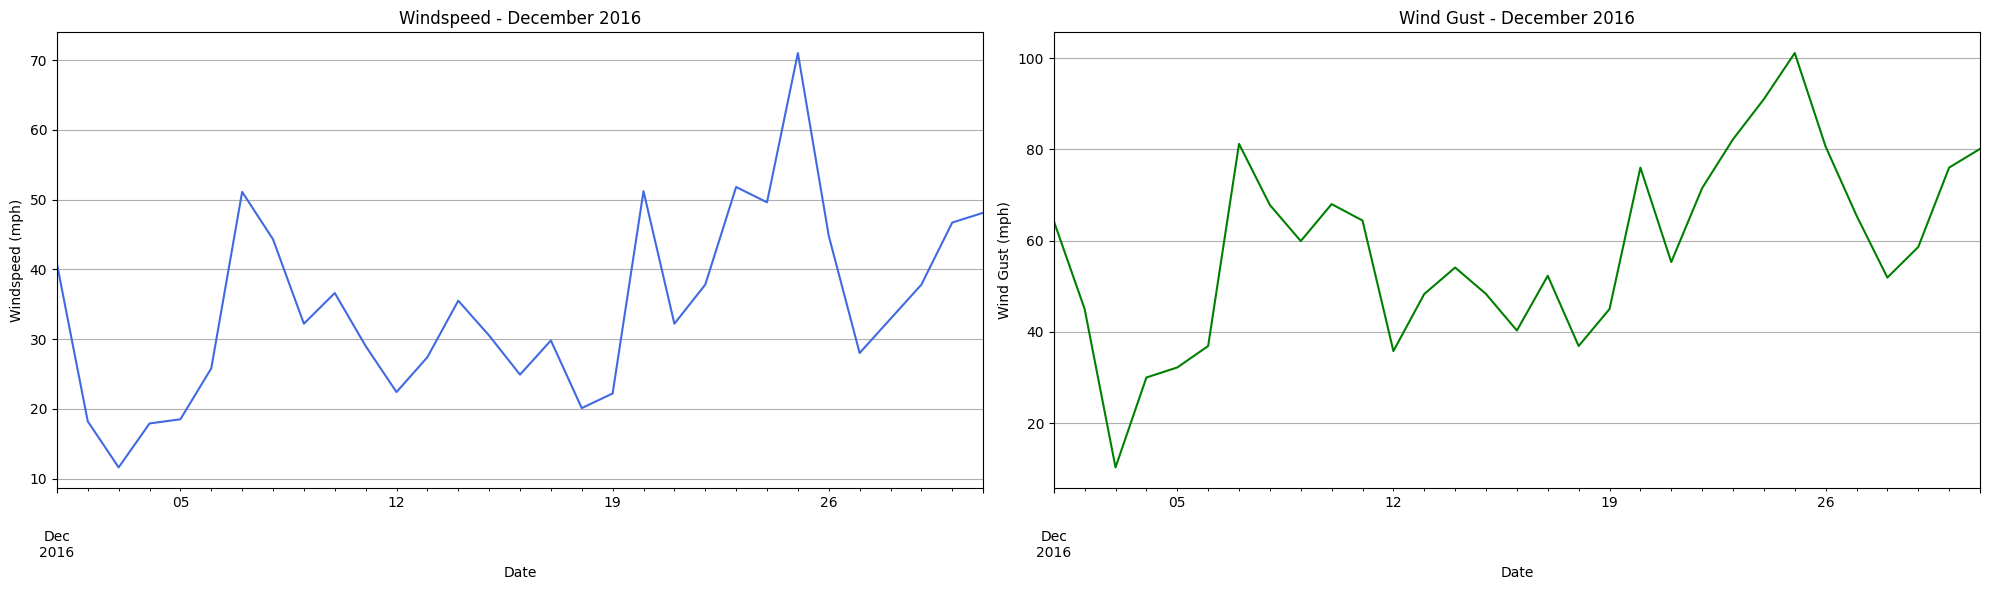

In [345]:
braemar_dec_2016 = braemar_df.loc['2016-12-01':'2016-12-31']

import matplotlib.pyplot as plt

# Create subplots for three plots: windspeed, dew, and sea level pressure
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

braemar_dec_2016['windspeed'].plot(ax=axs[0], color='royalblue', title="Windspeed - December 2016")
axs[0].set_ylabel("Windspeed (mph)")
axs[0].set_xlabel("Date")
axs[0].grid(True)

braemar_dec_2016['windgust'].plot(ax=axs[1], color='green', title="Wind Gust - December 2016")
axs[1].set_ylabel("Wind Gust (mph)")
axs[1].set_xlabel("Date")
axs[1].grid(True)

plt.tight_layout()
plt.show()

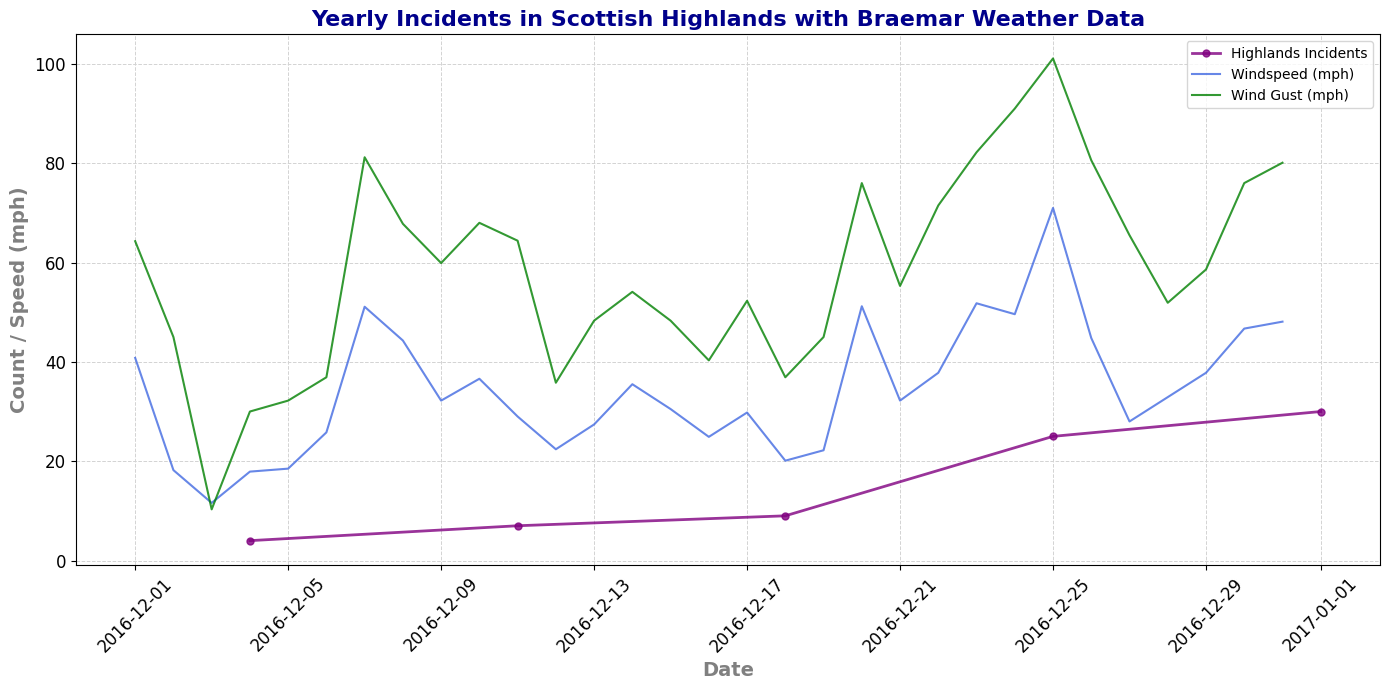

In [346]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data loading (ensure highlands_2016 and braemar_df are defined)

# Resample the Highlands incidents data monthly
highlands_2016_dec = highlands_2016.loc['2016-12-01':'2016-12-31'].resample('W').size()

# Filter Braemar data for December 2016
braemar_dec_2016_dec = braemar_df.loc['2016-12-01':'2016-12-31']

# Create a single figure
plt.figure(figsize=(14, 7))

# Plot the Highlands incidents
plt.plot(highlands_2016_dec.index, highlands_2016_dec, 
         marker='o', linestyle='-', color='purple', 
         linewidth=2, markersize=5, alpha=0.8, label='Highlands Incidents')

# Overlay wind speed and wind gust from Braemar dataset
plt.plot(braemar_dec_2016_dec.index, braemar_dec_2016_dec['windspeed'], 
         color='royalblue', label='Windspeed (mph)', alpha=0.8)

plt.plot(braemar_dec_2016_dec.index, braemar_dec_2016_dec['windgust'], 
         color='green', label='Wind Gust (mph)', alpha=0.8)

# Titles and labels
plt.title('Yearly Incidents in Scottish Highlands with Braemar Weather Data', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Date', fontsize=14, fontweight='bold', color='gray')
plt.ylabel('Count / Speed (mph)', fontsize=14, fontweight='bold', color='gray')

# Adding grid and legend
plt.grid(color='lightgray', linestyle='--', linewidth=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()
